# 1. Install and Import Dependencies

In [ ]:
!pip install transformers

In [ ]:
!pip install scipy

In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
!pip install langid

# 2. Instantiate Model

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [2]:
# load model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']

# 3. Collect Data

In [ ]:
#tweet = "@MehranShakarami today's cold @ home 😒 https://mehranshakarami.com"
#tweet = "MY GIRL GOT HER SOUND TOWN ON WRAPPED AS NOIDA LMFAOOOOOOO😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭"

In [3]:
import pandas as pd
import numpy as np
import os

bjp = pd.read_csv(os.path.join("tweets_BJP.csv"))
con = pd.read_csv(os.path.join("tweets_Congress.csv"))

# BJP-

In [4]:
bjp

,Unnamed: 0,Username,Link,Text,Date,Likes,Comments,Retweets
0,0,@BJP4India,https://twitter.com/BJP4India/status/173443943...,Congress presents the 𝐌𝐎𝐍𝐄𝐘 𝐇𝐄𝐈𝐒𝐓!,"Dec 12, 2023 · 5:05 AM UTC",27426,743,7765
1,1,@BJP4India,https://twitter.com/BJP4India/status/173488317...,Swearing-in ceremony of the new government of ...,"Dec 13, 2023 · 10:29 AM UTC",328,14,126
2,2,@BJP4India,https://twitter.com/BJP4India/status/173486733...,"है शपथ, हर गारंटी को पूरा करने की गारंटी की! ...","Dec 13, 2023 · 9:26 AM UTC",1507,79,331
3,3,@AmitShah,https://twitter.com/AmitShah/status/1734842884...,मध्य प्रदेश के मुख्यमंत्री पद की शपथ लेने पर श...,"Dec 13, 2023 · 7:49 AM UTC",2593,111,676
4,4,@JPNadda,https://twitter.com/JPNadda/status/17348489394...,श्री @DrMohanYadav51 को मध्य प्रदेश राज्य के म...,"Dec 13, 2023 · 8:13 AM UTC",905,44,381
...,...,...,...,...,...,...,...,...
595,595,@BJP4India,https://twitter.com/BJP4India/status/172915560...,"किसी पर्व पर जब हम कुछ भी स्वदेशी ख़रीदते हैं,...","Nov 27, 2023 · 3:09 PM UTC",6427,42,1189
596,596,@BJP4India,https://twitter.com/BJP4India/status/172915548...,"दीया सबको जोड़ता है, सबको रास्ता दिखाता है। इ...","Nov 27, 2023 · 3:09 PM UTC",443,13,210
597,597,@BJP4India,https://twitter.com/BJP4India/status/172915525...,All the Diyas (lamps) lit here have one more m...,"Nov 27, 2023 · 3:08 PM UTC",478,18,206
598,598,@BJP4India,https://twitter.com/BJP4India/status/172915324...,आज गुरु नानक देव जी का प्रकाश पर्व भी है। अब स...,"Nov 27, 2023 · 3:00 PM UTC",423,10,231


In [5]:
bjp=bjp.sort_values(by=['Likes','Comments','Retweets'],ascending=False)
bjp

,Unnamed: 0,Username,Link,Text,Date,Likes,Comments,Retweets
411,411,@narendramodi,https://twitter.com/narendramodi/status/173126...,"My dear sisters and brothers of Telangana, Th...","Dec 3, 2023 · 11:06 AM UTC",163603,3234,20269
200,200,@narendramodi,https://twitter.com/narendramodi/status/173304...,देशवासी इन नोटों के ढेर को देखें और फिर इनके न...,"Dec 8, 2023 · 8:28 AM UTC",143685,13283,37553
87,87,@narendramodi,https://twitter.com/narendramodi/status/173410...,Today's Supreme Court verdict on the abrogatio...,"Dec 11, 2023 · 7:04 AM UTC",121606,4506,30057
313,313,@narendramodi,https://twitter.com/narendramodi/status/173190...,"May they be happy with their arrogance, lies, ...","Dec 5, 2023 · 5:05 AM UTC",111930,9381,30998
571,571,@narendramodi,https://twitter.com/narendramodi/status/172952...,उत्तरकाशी में हमारे श्रमिक भाइयों के रेस्क्यू ...,"Nov 28, 2023 · 3:24 PM UTC",101915,4996,20506
...,...,...,...,...,...,...,...,...
222,222,@BJP4India,https://twitter.com/BJP4India/status/173302128...,उत्तराखंड की सरकार अपनी तरफ से जमीनी सच्चाई को...,"Dec 8, 2023 · 7:10 AM UTC",305,8,182
431,431,@BJP4India,https://twitter.com/BJP4India/status/173059159...,इस फेस के तीन मुख्य फोकस होंगे- पहला- inclus...,"Dec 1, 2023 · 2:16 PM UTC",254,4,154
156,156,@BJP4India,https://twitter.com/BJP4India/status/173336060...,"Also, two leading international universities h...","Dec 9, 2023 · 5:39 AM UTC",191,3,114
160,160,@BJP4India,https://twitter.com/BJP4India/status/173335780...,"Today, the whole world is looking at India wit...","Dec 9, 2023 · 5:28 AM UTC",182,4,105


In [6]:
bjp_top = bjp[:100]
bjp_top

,Unnamed: 0,Username,Link,Text,Date,Likes,Comments,Retweets
411,411,@narendramodi,https://twitter.com/narendramodi/status/173126...,"My dear sisters and brothers of Telangana, Th...","Dec 3, 2023 · 11:06 AM UTC",163603,3234,20269
200,200,@narendramodi,https://twitter.com/narendramodi/status/173304...,देशवासी इन नोटों के ढेर को देखें और फिर इनके न...,"Dec 8, 2023 · 8:28 AM UTC",143685,13283,37553
87,87,@narendramodi,https://twitter.com/narendramodi/status/173410...,Today's Supreme Court verdict on the abrogatio...,"Dec 11, 2023 · 7:04 AM UTC",121606,4506,30057
313,313,@narendramodi,https://twitter.com/narendramodi/status/173190...,"May they be happy with their arrogance, lies, ...","Dec 5, 2023 · 5:05 AM UTC",111930,9381,30998
571,571,@narendramodi,https://twitter.com/narendramodi/status/172952...,उत्तरकाशी में हमारे श्रमिक भाइयों के रेस्क्यू ...,"Nov 28, 2023 · 3:24 PM UTC",101915,4996,20506
...,...,...,...,...,...,...,...,...
541,541,@BJP4India,https://twitter.com/BJP4India/status/172990808...,हमेशा से सनातन विरोधी रही है कांग्रेस की विचार...,"Nov 29, 2023 · 5:00 PM UTC",5402,378,2069
118,118,@JPNadda,https://twitter.com/JPNadda/status/17337200813...,"बंधु जवाब तो देना पड़ेगा, तुमको भी और तुम्हारे...","Dec 10, 2023 · 5:27 AM UTC",5342,347,2133
418,418,@BJP4India,https://twitter.com/BJP4India/status/173098882...,नए भारत में देश की सेना सशक्त भी और आत्मनिर्भर...,"Dec 2, 2023 · 4:34 PM UTC",5333,126,1419
343,343,@BJP4India,https://twitter.com/BJP4India/status/173161073...,"Grateful for your trust and support, Mizoram!","Dec 4, 2023 · 9:45 AM UTC",5303,71,924


In [7]:
bjp_list = bjp_top["Text"]
bjp_list = list(bjp_list)
bjp_list

['My dear sisters and brothers of Telangana,  Thank you for your support to the @BJP4India. Over the last few years, this support has only been increasing and this trend will continue in the times to come.   Our bond with Telangana is unbreakable and we will keep working for the people.   I also appreciate the industrious efforts of each and every BJP Karyakarta.',
 "देशवासी इन नोटों के ढेर को देखें और फिर इनके नेताओं के ईमानदारी के 'भाषणों' को सुनें... 😂😂😂  जनता से जो लूटा है, उसकी पाई-पाई लौटानी पड़ेगी, यह मोदी की गारंटी है।   ❌❌❌💵 💵 💵❌❌❌",
 "Today's Supreme Court verdict on the abrogation of Article 370 is historic and constitutionally upholds the decision taken by the Parliament of India on 5th August 2019; it is a resounding declaration of hope, progress and unity for our sisters and brothers in Jammu, Kashmir and Ladakh. The Court, in its profound wisdom, has fortified the very essence of unity that we, as Indians, hold dear and cherish above all else.  I want to assure the resil

In [12]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from googletrans import Translator
import torch
import numpy as np
from scipy.special import softmax
import langid

# Assuming you have already initialized the tokenizer and model
#tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
#model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')


# Initialize translator
translator = Translator()

# Your list of tweets
list_of_tweets = bjp_list

# Initialize lists to store scores
positive_scores = []
negative_scores = []
neutral_scores = []
translated_tweets=[]
# Iterate through each tweet
for tweet in list_of_tweets:
    # Preprocess tweet
    tweet_words = []
    # Detect language using langid
    language, confidence = langid.classify(tweet)

    # Translate non-English tweets to English
    if language != 'en':
        try:
            translation = translator.translate(tweet, src=language, dest='en').text
        except:
            print("error in: ",tweet)
            
    else:
        translation = tweet

    for word in translation.split(' '):
        if word.startswith('@') and len(word) > 1:
            word = word[1:]
        elif word.startswith('http'):
            word = "http"
        tweet_words.append(word)

    tweet_proc = " ".join(tweet_words)
    translated_tweets.append(tweet_proc)
    # Sentiment analysis
    encoded_tweet = tokenizer(tweet_proc, return_tensors='pt', max_length=100, truncation=True)
    output = model(**encoded_tweet)

    # Softmax to get probabilities
    scores = softmax(output[0][0].detach().numpy())

    # Append scores to respective lists
    positive_scores.append(scores[2])  # Positive class index is 2
    negative_scores.append(scores[0])  # Negative class index is 0
    neutral_scores.append(scores[1])   # Neutral class index is 1

# Print or use the scores as needed
for tweet, positive, negative, neutral in zip(translated_tweets, positive_scores, negative_scores, neutral_scores):
    print(f"Tweet: {tweet}\nPositive Score: {positive}, Negative Score: {negative}, Neutral Score: {neutral}\n")


error in:  🤷‍♂️🤷‍♀️
error in:  𝐂𝐨𝐧𝐠𝐫𝐞𝐬𝐬’ 𝐬𝐞𝐥𝐟𝐢𝐞 𝐰𝐢𝐭𝐡 𝐂𝐎𝐑𝐑𝐔𝐏𝐓𝐈𝐎𝐍!
Tweet: My dear sisters and brothers of Telangana,  Thank you for your support to the BJP4India. Over the last few years, this support has only been increasing and this trend will continue in the times to come.   Our bond with Telangana is unbreakable and we will keep working for the people.   I also appreciate the industrious efforts of each and every BJP Karyakarta.
Positive Score: 0.9829573035240173, Negative Score: 0.0012568557867780328, Neutral Score: 0.01578584499657154

Tweet: The countrymen should look at these piles of currency notes and then listen to the honest 'speeches' of their leaders... ➡️Whatever has been looted from the public, every penny of it will have to be returned, this is Modi's guarantee.
Positive Score: 0.056293338537216187, Negative Score: 0.4358040690422058, Neutral Score: 0.5079025626182556

Tweet: Today's Supreme Court verdict on the abrogation of Article 370 is historic and constitutionally 

In [13]:
positive_sum=sum(positive_scores)
negative_sum=sum(negative_scores)
neutral_sum=sum(neutral_scores)

print("average positive sum: ", (positive_sum/len(positive_scores))*100,"%")
print("average negative sum: ", (negative_sum/len(negative_scores))*100,"%")
print("average neutral sum: ", (neutral_sum/len(neutral_scores))*100,"%")

average positive sum:  46.02668841765262 %
average negative sum:  16.846732625213917 %
average neutral sum:  37.126579370349646 %


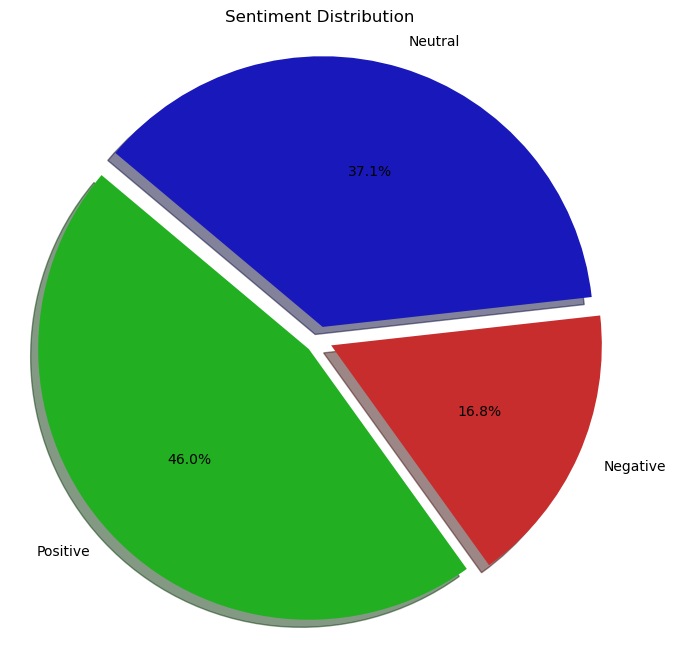

In [14]:
import matplotlib.pyplot as plt

# Assuming you have calculated the average scores
average_positive = (positive_sum / len(positive_scores)) * 100
average_negative = (negative_sum / len(negative_scores)) * 100
average_neutral = (neutral_sum / len(neutral_scores)) * 100

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [average_positive, average_negative, average_neutral]
colors = ['#22b022', '#c72d2d', '#1818bb'] # green, red, blue
explode = (0.05, 0.05, 0.05)  # explode 1st slice (i.e., 'Positive')

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Distribution')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


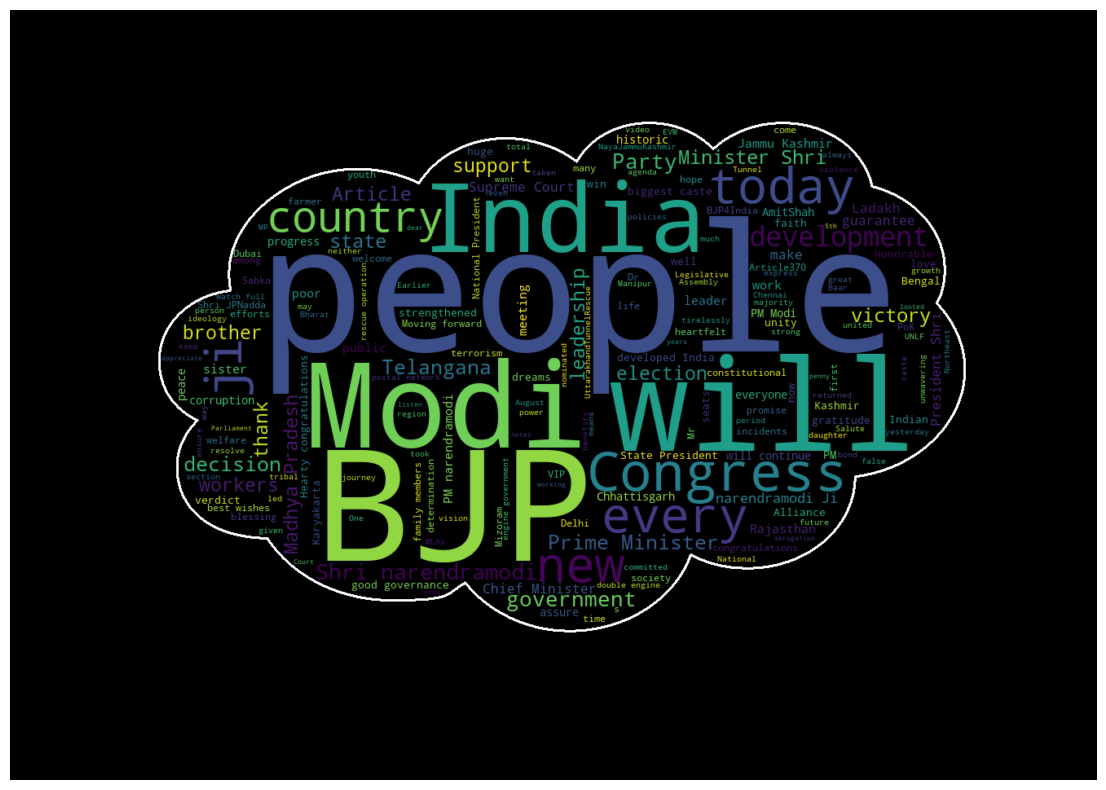

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

text = ' '.join(translated_tweets)

mask = np.array(Image.open("ok.png"))

# Create and generate a word cloud image
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',  # Background color
    mask=mask,
    contour_width=2,  # Outline width
    contour_color='white',  # Outline color
    max_words=200,  # Maximum number of words
    colormap='viridis',  # Color map
    stopwords=set(STOPWORDS),  # Stopwords to exclude
).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

In [ ]:
tweet = input("enter tweet: ")

# precprcess tweet
tweet_words = []

for word in tweet.split(' '):
    if word.startswith('@') and len(word) > 1: # someone is mentioned
        word = '@user'
    
    elif word.startswith('http'): # link is mentioned
        word = "http"
    tweet_words.append(word)

tweet_proc = " ".join(tweet_words)

print(tweet_words)

print(tweet_proc)

# 4. Sentiment Analysis

# sentiment analysis
encoded_tweet = tokenizer(tweet_proc, return_tensors='pt')
# output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])
output = model(**encoded_tweet)

scores = output[0][0].detach().numpy()
scores = softmax(scores)

for i in range(len(scores)):
    
    l = labels[i]
    s = scores[i]
    print(l,s)

# Congress-

In [20]:
con

,Unnamed: 0,Username,Link,Text,Date,Likes,Comments,Retweets
0,0,@INCIndia,https://twitter.com/INCIndia/status/1734878480...,BJP सांसद प्रताप सिम्हा के PASS पर संसद में घु...,"Dec 13, 2023 · 10:10 AM UTC",1262,72,480
1,1,@kharge,https://twitter.com/kharge/status/173487223001...,आज संसद में जो security breach हुआ वह एक बहुत ...,"Dec 13, 2023 · 9:45 AM UTC",1200,50,493
2,2,@INCIndia,https://twitter.com/INCIndia/status/1734873518...,"Sadly, the Post Office Bill offers no new idea...","Dec 13, 2023 · 9:50 AM UTC",252,19,135
3,3,@INCIndia,https://twitter.com/INCIndia/status/1734864491...,आज सदन में दो लोग घुस गए और वहां गड़बड़ी की। ...,"Dec 13, 2023 · 9:15 AM UTC",1217,62,489
4,4,@kcvenugopalmp,https://twitter.com/kcvenugopalmp/status/17348...,The infiltration in the Lok Sabha is extremely...,"Dec 13, 2023 · 8:52 AM UTC",538,18,246
...,...,...,...,...,...,...,...,...
595,595,@INCIndia,https://twitter.com/INCIndia/status/1728369175...,मेरे भाई राहुल गांधी जी ने कन्याकुमारी से कश्म...,"Nov 25, 2023 · 11:04 AM UTC",4864,140,1322
596,596,@INCIndia,https://twitter.com/INCIndia/status/1728361684...,LIVE: Shri @RahulGandhi addresses the public i...,"Nov 25, 2023 · 10:35 AM UTC",902,30,455
597,597,@INCIndia,https://twitter.com/INCIndia/status/1728359844...,कांग्रेस महासचिव श्रीमती @priyankagandhi जी ने...,"Nov 25, 2023 · 10:27 AM UTC",3587,36,641
598,598,@INCIndia,https://twitter.com/INCIndia/status/1728359623...,आप अडानी की सरकार चाहते हो ...,"Nov 25, 2023 · 10:27 AM UTC",1900,347,662


In [21]:
con=con.sort_values(by=['Likes','Comments','Retweets'],ascending=False)
con

,Unnamed: 0,Username,Link,Text,Date,Likes,Comments,Retweets
257,257,@RahulGandhi,https://twitter.com/RahulGandhi/status/1731278...,"मध्य प्रदेश, छत्तीसगढ़ और राजस्थान का जनादेश ह...","Dec 3, 2023 · 11:44 AM UTC",64331,8997,12800
201,201,@RahulGandhi,https://twitter.com/RahulGandhi/status/1732285...,"Congratulations to Telangana’s CM Designate, @...","Dec 6, 2023 · 6:25 AM UTC",45732,1879,8649
166,166,@RahulGandhi,https://twitter.com/RahulGandhi/status/1732691...,Congratulations to the newly sworn-in Chief Mi...,"Dec 7, 2023 · 9:20 AM UTC",32056,1334,6961
421,421,@RahulGandhi,https://twitter.com/RahulGandhi/status/1729535...,उत्तरकाशी की सिलक्यारा सुरंग में फंसे श्रमिक भ...,"Nov 28, 2023 · 4:20 PM UTC",29761,1681,6730
331,331,@INCIndia,https://twitter.com/INCIndia/status/1730432479...,वो वाली संपत्ति मुझे चाहिए,"Dec 1, 2023 · 3:43 AM UTC",24250,2675,4839
...,...,...,...,...,...,...,...,...
479,479,@INCIndia,https://twitter.com/INCIndia/status/1729321712...,Smt. @priyankagandhi will address the public i...,"Nov 28, 2023 · 2:10 AM UTC",358,18,225
480,480,@INCIndia,https://twitter.com/INCIndia/status/1729316679...,Shri @RahulGandhi will address the public in N...,"Nov 28, 2023 · 1:50 AM UTC",355,20,230
12,12,@INCIndia,https://twitter.com/INCIndia/status/1734832977...,The Provisional Collection of Taxes Bill clear...,"Dec 13, 2023 · 7:09 AM UTC",344,23,174
524,524,@INCIndia,https://twitter.com/INCIndia/status/1728954291...,Congress President Shri @kharge will address a...,"Nov 27, 2023 · 1:50 AM UTC",338,10,194


In [22]:
con_top = con[:100]
con_top

,Unnamed: 0,Username,Link,Text,Date,Likes,Comments,Retweets
257,257,@RahulGandhi,https://twitter.com/RahulGandhi/status/1731278...,"मध्य प्रदेश, छत्तीसगढ़ और राजस्थान का जनादेश ह...","Dec 3, 2023 · 11:44 AM UTC",64331,8997,12800
201,201,@RahulGandhi,https://twitter.com/RahulGandhi/status/1732285...,"Congratulations to Telangana’s CM Designate, @...","Dec 6, 2023 · 6:25 AM UTC",45732,1879,8649
166,166,@RahulGandhi,https://twitter.com/RahulGandhi/status/1732691...,Congratulations to the newly sworn-in Chief Mi...,"Dec 7, 2023 · 9:20 AM UTC",32056,1334,6961
421,421,@RahulGandhi,https://twitter.com/RahulGandhi/status/1729535...,उत्तरकाशी की सिलक्यारा सुरंग में फंसे श्रमिक भ...,"Nov 28, 2023 · 4:20 PM UTC",29761,1681,6730
331,331,@INCIndia,https://twitter.com/INCIndia/status/1730432479...,वो वाली संपत्ति मुझे चाहिए,"Dec 1, 2023 · 3:43 AM UTC",24250,2675,4839
...,...,...,...,...,...,...,...,...
120,120,@INCIndia,https://twitter.com/INCIndia/status/1733358310...,"""𝕴𝖓𝖉𝖎𝖆 𝖎𝖘 𝖒𝖞 𝖍𝖔𝖒𝖊!"" ❤️","Dec 9, 2023 · 5:30 AM UTC",6122,365,1293
424,424,@INCIndia,https://twitter.com/INCIndia/status/1729523865...,आज जननायक @RahulGandhi जी ने हैदराबाद की सड़को...,"Nov 28, 2023 · 3:33 PM UTC",6113,278,1728
344,344,@INCIndia,https://twitter.com/INCIndia/status/1730225178...,JANNAYAK,"Nov 30, 2023 · 2:00 PM UTC",6072,436,1163
90,90,@INCIndia,https://twitter.com/INCIndia/status/1733798723...,PM मोदी का VIP सिर्फ एक है- अडानी,"Dec 10, 2023 · 10:40 AM UTC",6057,747,1639


In [23]:
con_list = con_top["Text"]
con_list = list(con_list)
con_list

['मध्य प्रदेश, छत्तीसगढ़ और राजस्थान का जनादेश हम विनम्रतापूर्वक स्वीकार करते हैं - विचारधारा की लड़ाई जारी रहेगी।  तेलंगाना के लोगों को मेरा बहुत धन्यवाद - प्रजालु तेलंगाना बनाने का वादा हम ज़रूर पूरा करेंगे।  सभी कार्यकर्ताओं को उनकी मेहनत और समर्थन के लिए दिल से शुक्रिया।',
 'Congratulations to Telangana’s CM Designate, @revanth_anumula.  Under his leadership, the Congress govt will fulfill all its Guarantees to the people of Telangana and build a Prajala Sarkar.',
 "Congratulations to the newly sworn-in Chief Minister of Telangana, Revanth Reddy garu, and his team!   The work of Prajala Sarkar has now begun. We will deliver the dream of 'Bangaru Telangana', and fulfil all our Guarantees.",
 'उत्तरकाशी की सिलक्यारा सुरंग में फंसे श्रमिक भाइयों की सुरक्षित वापसी बहुत ही खुशी का समाचार है। उन्हें और उनके परिवारों को मेरी दिली बधाई।   भारत का निर्माण करने वाले हमारे मज़दूर भाइयों की सुरक्षा सर्वोपरि है। इस मुश्किल अभियान को सफल बनाने वाले सभी जांबाज़ों को मेरा सलाम है।  #UttarakhandTun

In [24]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from googletrans import Translator
import torch
import numpy as np
from scipy.special import softmax
import langid

# Assuming you have already initialized the tokenizer and model
#tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
#model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')


# Initialize translator
translator = Translator()

# Your list of tweets
list_of_tweets = con_list

# Initialize lists to store scores
positive_scores = []
negative_scores = []
neutral_scores = []
translated_tweets=[]
# Iterate through each tweet
for tweet in list_of_tweets:
    # Preprocess tweet
    tweet_words = []
    # Detect language using langid
    language, confidence = langid.classify(tweet)

    # Translate non-English tweets to English
    if language != 'en':
        try:
            translation = translator.translate(tweet, src=language, dest='en').text
        except:
            print("error in: ",tweet)
            
    else:
        translation = tweet

    for word in translation.split(' '):
        if word.startswith('@') and len(word) > 1:
            word = word[1:]
        elif word.startswith('http'):
            word = "http"
        tweet_words.append(word)

    tweet_proc = " ".join(tweet_words)
    translated_tweets.append(tweet_proc)
    # Sentiment analysis
    encoded_tweet = tokenizer(tweet_proc, return_tensors='pt', max_length=100, truncation=True)
    output = model(**encoded_tweet)

    # Softmax to get probabilities
    scores = softmax(output[0][0].detach().numpy())

    # Append scores to respective lists
    positive_scores.append(scores[2])  # Positive class index is 2
    negative_scores.append(scores[0])  # Negative class index is 0
    neutral_scores.append(scores[1])   # Neutral class index is 1

# Print or use the scores as needed
for tweet, positive, negative, neutral in zip(translated_tweets, positive_scores, negative_scores, neutral_scores):
    print(f"Tweet: {tweet}\nPositive Score: {positive}, Negative Score: {negative}, Neutral Score: {neutral}\n")


error in:  JanNayak ❤️
error in:  🇮🇳
error in:  ❤️
error in:  JanNayak ❤️
error in:  ❤️
error in:  ❤️
error in:  ♥️
error in:  ♥️
error in:  ❤️
error in:  ✋
error in:  ❤️
error in:  𝐒𝐞𝐥𝐟𝐢𝐞 𝐖𝐢𝐭𝐡 𝐁𝐞𝐬𝐭𝐢𝐞
error in:  Jannayak ❤️
error in:  𝗪𝗶𝗻𝗻𝗶𝗻𝗴 𝗩𝗶𝗯𝗲𝘀! ❤️  📍Telangana ✋
Tweet: We humbly accept the mandate of Madhya Pradesh, Chhattisgarh and Rajasthan - the battle of ideology will continue. I am very thankful to the people of Telangana - we will definitely fulfill the promise of making Prajalu Telangana. Heartfelt thanks to all the workers for their hard work and support.
Positive Score: 0.9807515144348145, Negative Score: 0.0013975834008306265, Neutral Score: 0.01785094290971756

Tweet: Congratulations to Telangana’s CM Designate, revanth_anumula.  Under his leadership, the Congress govt will fulfill all its Guarantees to the people of Telangana and build a Prajala Sarkar.
Positive Score: 0.9573283791542053, Negative Score: 0.001764077926054597, Neutral Score: 0.04090750962495804

Tweet: C

In [25]:
positive_sum=sum(positive_scores)
negative_sum=sum(negative_scores)
neutral_sum=sum(neutral_scores)

print("average positive sum: ", (positive_sum/len(positive_scores))*100,"%")
print("average negative sum: ", (negative_sum/len(negative_scores))*100,"%")
print("average neutral sum: ", (neutral_sum/len(neutral_scores))*100,"%")

average positive sum:  45.92826251243241 %
average negative sum:  12.120354567538016 %
average neutral sum:  41.95138194411993 %


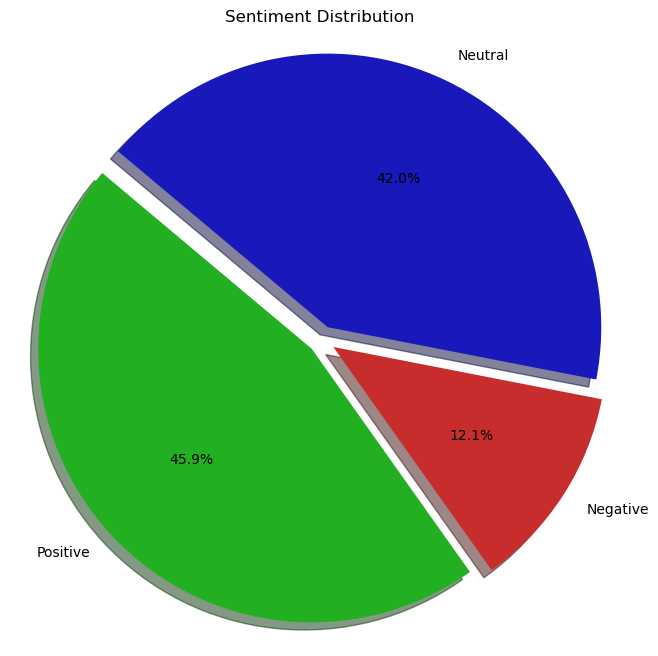

In [26]:
import matplotlib.pyplot as plt

# Assuming you have calculated the average scores
average_positive = (positive_sum / len(positive_scores)) * 100
average_negative = (negative_sum / len(negative_scores)) * 100
average_neutral = (neutral_sum / len(neutral_scores)) * 100

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [average_positive, average_negative, average_neutral]
colors = ['#22b022', '#c72d2d', '#1818bb'] # green, red, blue
explode = (0.05, 0.05, 0.05)  # explode 1st slice (i.e., 'Positive')

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Distribution')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


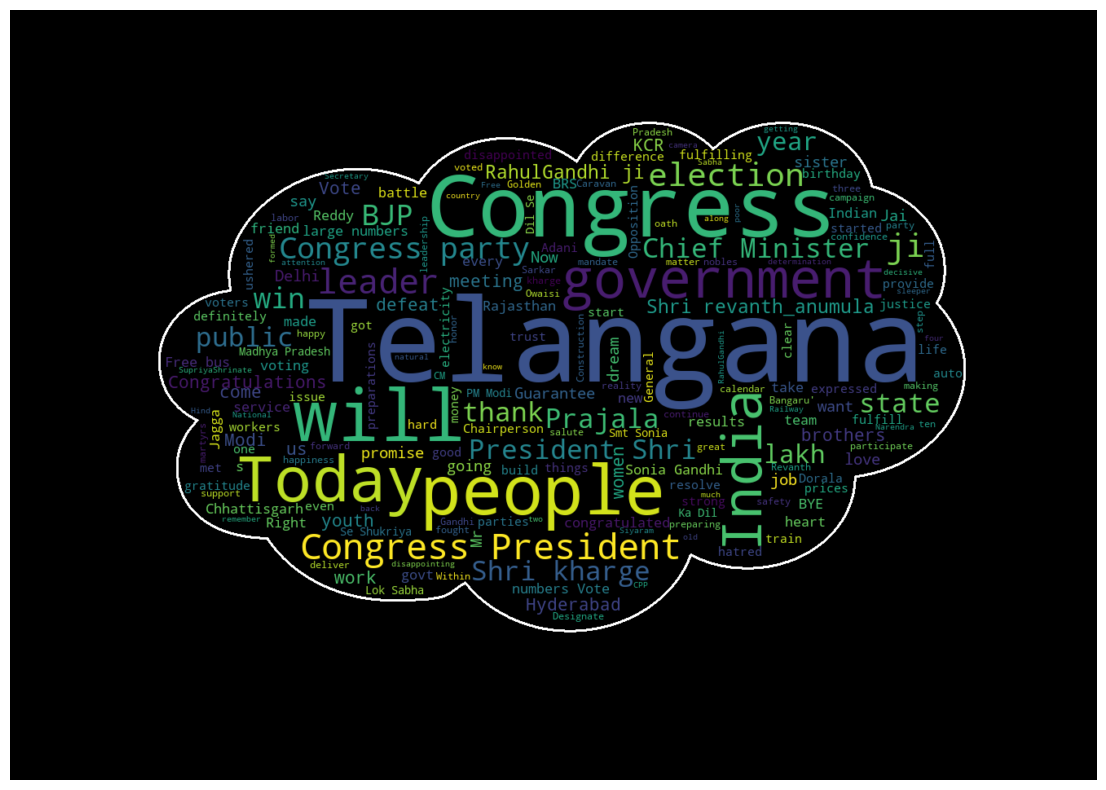

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

text = ' '.join(translated_tweets)

mask = np.array(Image.open("ok.png"))

# Create and generate a word cloud image
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',  # Background color
    mask=mask,
    contour_width=2,  # Outline width
    contour_color='white',  # Outline color
    max_words=200,  # Maximum number of words
    colormap='viridis',  # Color map
    stopwords=set(STOPWORDS),  # Stopwords to exclude
).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()